# A5 Oscilloscope
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.6.13

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df1 = pd.read_csv(r'A5 data\voltage.csv')
df1['U'] = df1['y']*df1['K']/1000
df1['Ueff_os'] = df1['U']/(2*2**(1/2))
df1['PE'] = (df1['Ueff_os']-df1['Ueff_vm'])/df1['Ueff_vm']

df1['U'] = df1['U'].round(decimals=2)
df1['Ueff_os'] = df1['Ueff_os'].round(decimals=2)
# df1['PE'] = df1['PE'].map(lambda x:format(x, '.2%'))

df1

,f,y,K,U,Ueff_os,Ueff_vm,PE
0,100.0,6.04,960,5.80,2.05,1.99250,0.028880
1,1000.0,6.04,960,5.80,2.05,1.99370,0.028261
2,10000.0,6.04,960,5.80,2.05,1.99160,0.029345
3,100000.0,6.04,960,5.80,2.05,1.98600,0.032248
4,1000000.0,6.04,970,5.86,2.07,1.84540,0.122466
5,10000000.0,6.44,970,6.25,2.21,0.00037,5968.127893


## EXP1

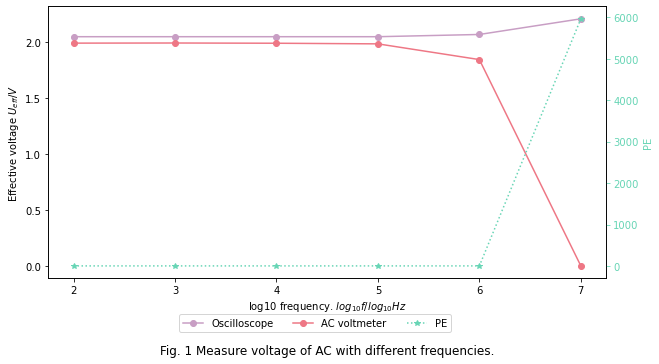

In [59]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(np.log10(df1['f']), df1['Ueff_os'], 'o-', color='#C89EC4', label='Oscilloscope')
ax1.plot(np.log10(df1['f']), df1['Ueff_vm'], 'o-', color='#EE7785', label='AC voltmeter')
ax1.set_xlabel('log10 frequency. $log_{10}f / log_{10}Hz$')
ax1.set_ylabel('Effective voltage $U_{eff}/V$')

ax2 = ax1.twinx()
ax2.plot(np.log10(df1['f']), df1['PE'], '*:', color='#67D5B5', label='PE')
ax2.set_ylabel('PE', color='#67D5B5')
ax2.tick_params(axis='y',colors='#67D5B5')

plt.title('Fig. 1 Measure voltage of AC with different frequencies.', y=-0.3)
fig.legend(loc='center left', bbox_to_anchor=(0.3, 0), ncol=3)
plt.savefig(r'A5 output\fig. 1.png', bbox_inches = 'tight', dpi=300)

## EXP2

In [61]:
df2 = pd.read_csv(r'A5 data\frequency.csv')
df2['T'] = df2['L']*df2['t0']
df2['f_os'] = 1/df2['T']
df2['PE'] = (df2['f_os']-df2['f_vm'])/df2['f_vm']

df2['PE'] = df2['PE'].map(lambda x:format(x, '.2%'))

df2

,f,L,t0,T,f_os,f_vm,PE
0,100.0,5.00,2.00000,10.000000,0.100000,0.1,0.00%
1,1000.0,5.00,0.20000,1.000000,1.000000,1.0,0.00%
2,10000.0,5.00,0.02000,0.100000,10.000000,10.0,0.00%
3,100000.0,5.00,0.00200,0.010000,100.000000,100.0,0.00%
4,1000000.0,4.96,0.00020,0.000992,1008.064516,0.0,inf%
5,10000000.0,5.00,0.00002,0.000100,10000.000000,0.0,inf%
